<center><h1>Image Data Analysis</h1><center>

* Image is a special kind of data where data is stored in the form of matrices. 
* When we have image in the form numbers arranged in a matrix, we can do all matrix operations.

### NumPy Matrix

In [1]:
import numpy as np

In [2]:
mat = np.matrix(
    [[1, 2, 3, 4, 5], 
     [3, 4, 5, 6, 1]]
)

In [3]:
mat.shape

(2, 5)

### Transpose Operation

In [4]:
mat.T

matrix([[1, 3],
        [2, 4],
        [3, 5],
        [4, 6],
        [5, 1]])

### Scalar Multiplication

In [5]:
3 * mat

matrix([[ 3,  6,  9, 12, 15],
        [ 9, 12, 15, 18,  3]])

In [6]:
iden = np.eye(N=5, M=5)
print(iden)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### 1) Can we convert `matrix` into `image`?

In [7]:
from matplotlib import pyplot as plt

`imshow()` of `plt`

In [8]:
mat

matrix([[1, 2, 3, 4, 5],
        [3, 4, 5, 6, 1]])

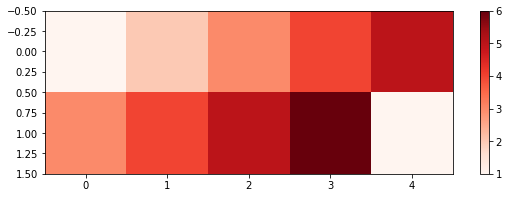

In [9]:
plt.figure(figsize=(10, 3))
image_mat = plt.imshow(mat, cmap='Reds')
plt.colorbar(image_mat)
plt.show()

### Convert large `matrix` into `image`

In [10]:
import random

* There should be 30 rows and 50 columns
* Each row of the matrix should have 50 numbers in the range of 1 and 200

In [11]:
big_mat = [
    [random.randint(1, 200) for i in range(50)]
    for j in range(30)
]

In [12]:
big_mat = np.matrix(big_mat)

In [13]:
big_mat

matrix([[133,  54, 127, ...,  89,  75, 152],
        [176, 110,  43, ..., 163, 164, 103],
        [ 49,  73, 133, ..., 144, 127,  30],
        ...,
        [124, 152, 122, ..., 150, 155,  59],
        [129,   5, 123, ..., 172, 101, 178],
        [133, 168,  41, ..., 126,  29,  28]])

In [14]:
big_mat.shape

(30, 50)

### Matrix to Image

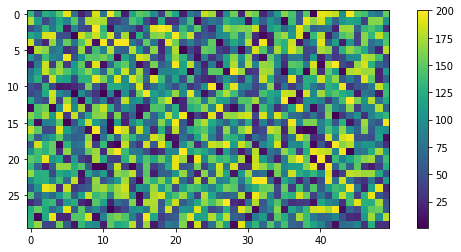

In [15]:
plt.figure(figsize=(10, 4))
image_mat = plt.imshow(big_mat, cmap=None)
plt.colorbar(image_mat)
plt.show()

### Transpose matrix to Image

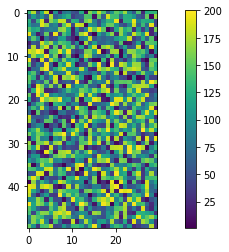

In [16]:
plt.figure(figsize=(10, 4))
trans_mat = big_mat.T
timage_mat = plt.imshow(trans_mat, cmap=None)
plt.colorbar(timage_mat)
plt.show()

### `grayscale` image

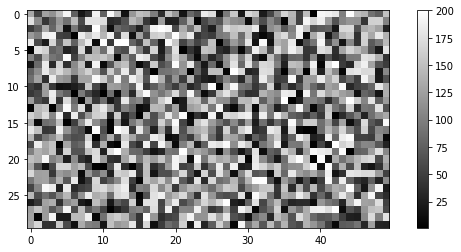

In [17]:
plt.figure(figsize=(10, 4))
gray_image = plt.imshow(big_mat, cmap='gray')
plt.colorbar(gray_image)
plt.show()

### 2) Can we convert `image` into `matrix`?

We should use `cv2` (`opencv-python`) package in python to compute matrix operations on images.

```sh
pip install opencv-python --user
```

A typical **colored image** is comprised of pixels (which are represented as RGB pixels). 

* A pixel is simply a number in the range of `0` to `255` for all `R`, `G`, and `B`.
* R → Red → 0 to 255
* G → Green → 0 to 255
* B → Blue → 0 to 255

<!-- <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1200%2F1*KR_rLx3p9icFj4Db5TUJoQ.jpeg"> -->

<img src="rgb_demo.png">

<br>

**Image by Author**

Some important colors and their RGB values - 

| Pixel | R | G | B |
| --- | --- | --- | --- |
| White | 255 | 255 | 255 |
| Red | 255 | 0 | 0 |
| Green | 0 | 255 | 0 |
| Blue | 0 | 0 | 255 |
| Black | 0 | 0 | 0 |
| Yellow | 255 | 255 | 0 |


* **All colors** → https://www.colorhexa.com/color-names

### Let's read the `image` and convert into `matrix`

The image that we will read is - 

<img src="http://www.imagemagick.org/Usage/fourier/lena_sharp14.png">

Read the `image` in the form of `matrix`

In [18]:
import cv2

`BGR`

In [19]:
image_mat = cv2.imread('lena_image.png')

The image matrix would be like - 

```python
[[[159 183 255] ... [142 202 255]]
 [[140 169 255] ... [ 87  74 159]]
 [[118 164 255] ... [ 62  14  81]]
 ...
 [[ 64  30  96] ... [ 61  33 119]]
 [[ 61  27  92] ... [ 74  65 178]]
 [[ 60  25  89] ... [ 80  72 202]]]
```

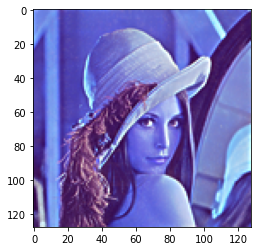

In [20]:
plt.imshow(image_mat)
plt.show()

* By default, the image is read in BGR format.
* We need to convert it into RGB format for our convenience.

### `BGR` → to → `RGB` format

In [21]:
image_mat = cv2.cvtColor(image_mat, cv2.COLOR_BGR2RGB)

The image matrix would be like - 

```python
[[[255 183 159] ... [255 202 142]]
 [[255 169 140] ... [159  74  87]]
 [[255 164 118] ... [ 81  14  62]]
 ...
 [[ 96  30  64] ... [119  33  61]]
 [[ 92  27  61] ... [178  65  74]]
 [[ 89  25  60] ... [202  72  80]]]
```

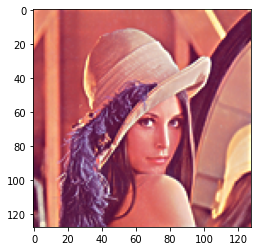

In [22]:
plt.imshow(image_mat)
plt.show()

Shape of the image matrix - `rows` and `columns`

In [23]:
image_mat.shape

(128, 128, 3)

In [24]:
rows, cols, p = image_mat.shape
print(rows)
print(cols)
print(p)

128
128
3


How many `pixels` are there in the above `image`?

In [25]:
pixels = rows * cols

In [26]:
pixels

16384

How many `pixel values` are there including `R`, `G`, and `B` values?

In [27]:
pixel_values = rows * cols * p

In [28]:
pixel_values

49152

### Separate `R`, `G`, and `B` from the image

<br>

<img src="separate_rgb.png">

<br>

**Image by Author**

We make use of `cv2.split()` method to separate the `RGB` pixels from the image.

In [29]:
rimage_mat, gimage_mat, bimage_mat = cv2.split(image_mat)

In [30]:
print("R → \n\n", rimage_mat)

R → 

 [[255 255 255 ... 212 255 255]
 [255 255 247 ... 227 227 159]
 [255 246 232 ... 190 103  81]
 ...
 [ 96 100 100 ... 105 100 119]
 [ 92  97  95 ... 105 124 178]
 [ 89  96  91 ... 115 156 202]]


In [31]:
print("G → \n\n", gimage_mat)

G → 

 [[183 174 167 ...  99 203 202]
 [169 156 149 ... 117 126  74]
 [164 142 136 ...  82  25  14]
 ...
 [ 30  33  34 ...  32  26  33]
 [ 27  30  28 ...  33  43  65]
 [ 25  29  24 ...  42  64  72]]


In [32]:
print("B → \n\n", bimage_mat)

B → 

 [[159 148 142 ... 101 163 142]
 [140 130 124 ... 107 113  87]
 [118 115 113 ...  83  64  62]
 ...
 [ 64  66  71 ...  63  58  61]
 [ 61  63  67 ...  62  68  74]
 [ 60  62  64 ...  72  82  80]]


### Plot `R`, `G`, and `B` separately

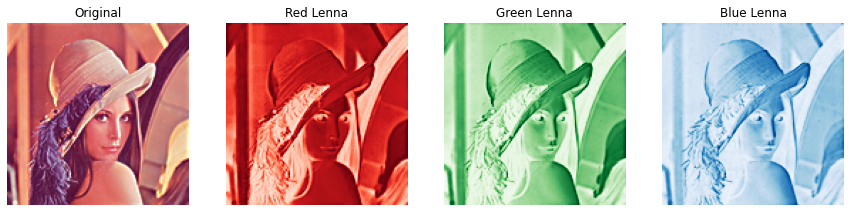

In [33]:
cmap_values = [None, 'Reds', 'Greens', 'Blues']
titles = ['Original', 'Red Lenna', 'Green Lenna', 'Blue Lenna']
image_matrices = [image_mat, rimage_mat, gimage_mat, bimage_mat]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))

for i, ax in zip(range(4), axes):
    ax.axis("off")
    ax.set_title(titles[i])
    ax.imshow(image_matrices[i], cmap=cmap_values[i])

plt.show()

### Some matrix operations

* Let's take grayscale matrix of original image

In [34]:
gray_image = cv2.imread('lena_image.png', 0)

In [35]:
gray_image.shape

(128, 128)

In [36]:
gray_image

array([[202, 195, 191, ..., 133, 214, 211],
       [192, 183, 175, ..., 149, 155, 101],
       [186, 170, 162, ..., 115,  52,  39],
       ...,
       [ 53,  57,  58, ...,  57,  51,  62],
       [ 50,  54,  52, ...,  58,  70, 100],
       [ 48,  53,  48, ...,  67,  93, 112]], dtype=uint8)

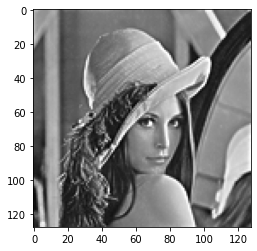

In [37]:
plt.imshow(gray_image, cmap='gray')
plt.show()

Tranpose gray lenna

In [38]:
trans_lenna = gray_image.T

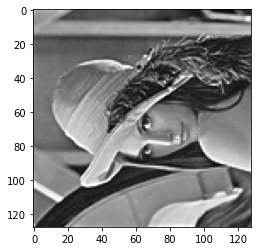

In [39]:
plt.imshow(trans_lenna, cmap='gray')
plt.show()

In [40]:
trans_lenna.shape

(128, 128)

### How can we transpose colored image?

Since each pixel is a combination of 3 values, we have to - 
* separate `R`, `G`, and `B` matrices
* apply `transpose` operation to all the 3 matrices
* merge `R`, `G`, and `B` matrices as a one single matrix

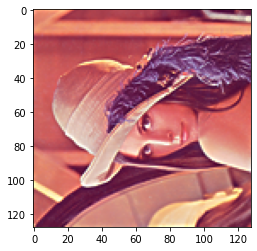

In [41]:
# separation of R, G, and B
rimage_mat, gimage_mat, bimage_mat = cv2.split(image_mat)

# transpose operation to all the 3 matrices
trans_r = rimage_mat.T
trans_g = gimage_mat.T
trans_b = bimage_mat.T

# merging R, G, and B matrices into one single matrix
trans_color_lenna = cv2.merge((trans_r, trans_g, trans_b))

# plotting the transposed colored image
plt.imshow(trans_color_lenna)
plt.show()

### Other operations

* Image Flipping
* Image Mirroring
* Image Equalization (One of the mind blowing operations)
    - Used for enhancing the contrast of an image
* Image Binarization
* Image Inversion
* Image Cropping
* Image Bordering
* Image Convolution with kernels (One of the mind blowing operations)
    - Used for Smoothening, Blurring, Edge detection etc

**PS: All you can find in my blog websites.**

* GitHub → https://github.com/msameeruddin/Image-Operations
* Hashnode → https://msameeruddin.hashnode.dev/
* Medium → https://msameeruddin.medium.com/